In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix



In [2]:
wine_df = pd.read_csv("winequality-red.csv")
print ("Dataset Shape;",wine_df.shape)

Dataset Shape; (1599, 12)


In [9]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [10]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

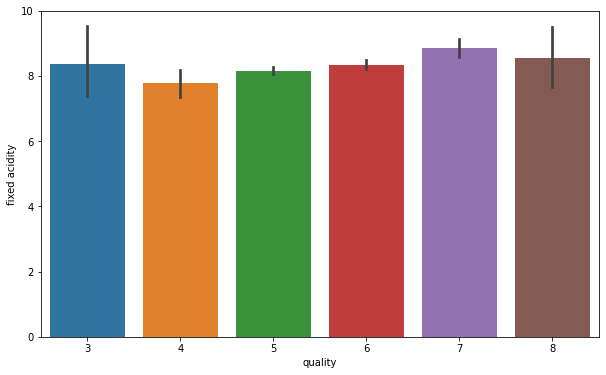

In [8]:
#fixed acidity v/s quality 
plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='fixed acidity',data=wine_df)



<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

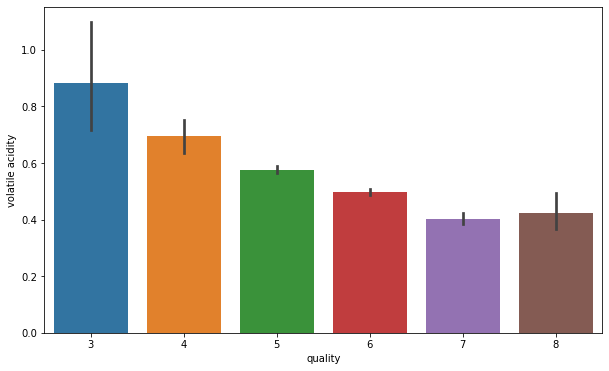

In [9]:
#valtile acidity v/s quality
plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='volatile acidity',data=wine_df)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

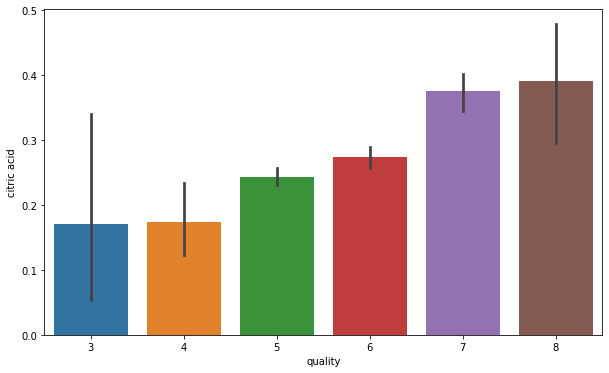

In [10]:
#critic acid v/s quality 
sns.barplot(x='quality',y='citric acid', data=wine_df)plt.figure(figsize=(10,6))


<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

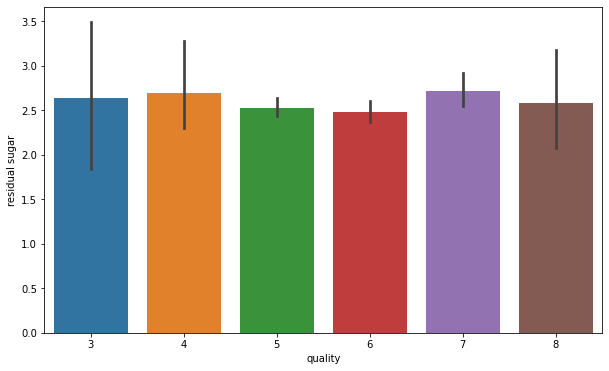

In [11]:
#Residual Sugar v/s Quality
fig=plt.figure(figsize=(10,6))
sns.barplot(x="quality",y="residual sugar",data=wine_df)

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

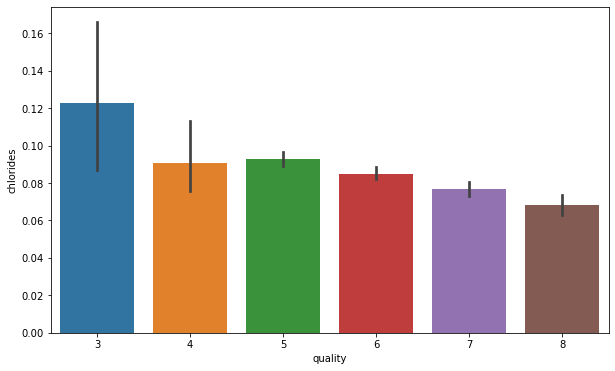

In [12]:
#chlorides v/s quality
fig=plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='chlorides',data=wine_df)

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

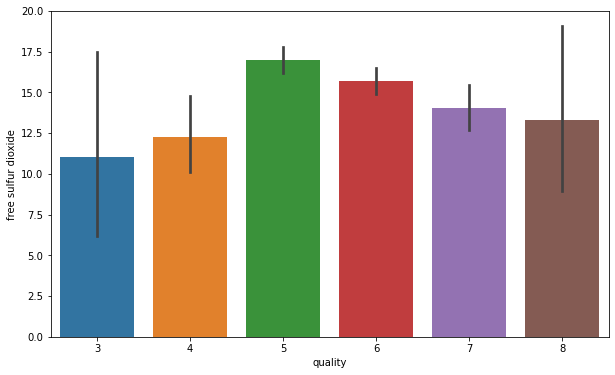

In [14]:
#free sulfir dioxide v/s quality
fig=plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='free sulfur dioxide',data=wine_df)


<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

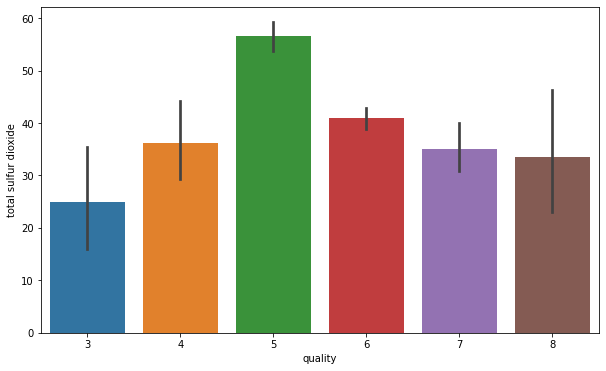

In [15]:
#total sulfur dioxide v/s quality
fig=plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='total sulfur dioxide',data=wine_df)

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

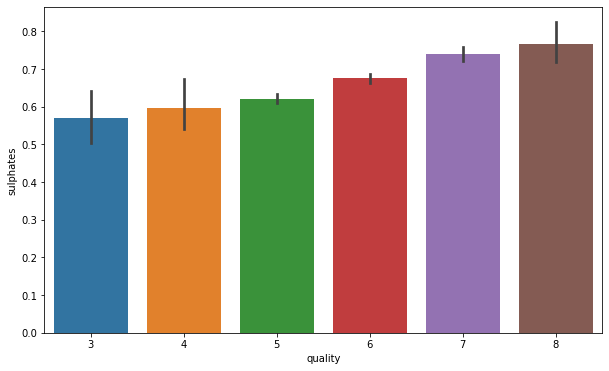

In [16]:
#sulphates v/s quality
fig=plt.figure(figsize=(10,6))
sns.barplot(x='quality', y='sulphates', data=wine_df)

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

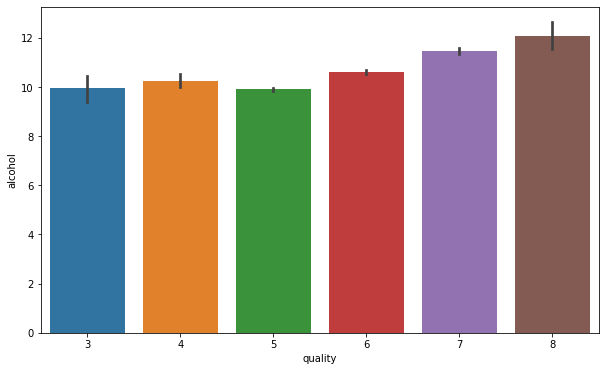

In [17]:
#alcohol v/s quality 
fig=plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='alcohol',data=wine_df)

<AxesSubplot:xlabel='quality', ylabel='pH'>

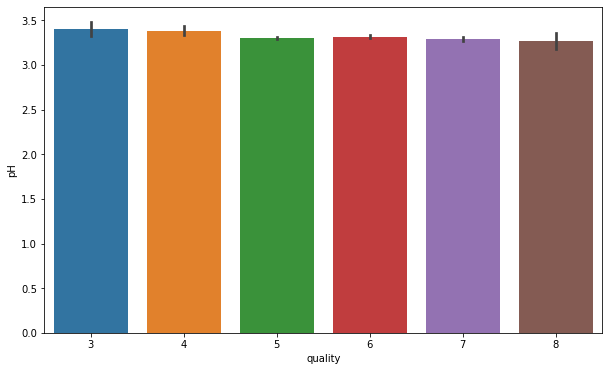

In [18]:
#PH v/s quality 
fig=plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='pH',data=wine_df)

In [12]:
wine_df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [3]:

wine_df['quality']=wine_df['quality'].apply(lambda x:1 if x >6.5 else 0)
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


0    1382
1     217
Name: quality, dtype: int64


C:\Users\INTEL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

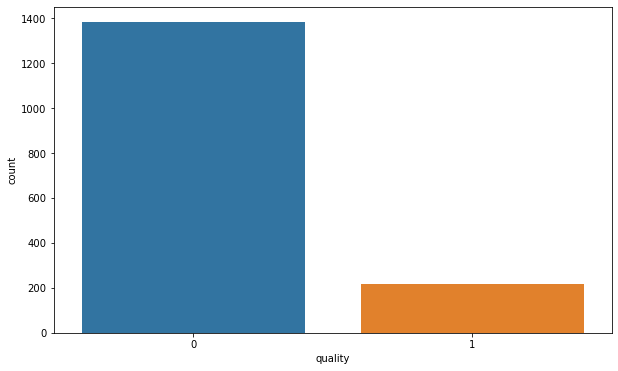

In [14]:
print(wine_df['quality'].value_counts())

fig=plt.figure(figsize=(10,6))
sns.countplot(wine_df['quality'])

In [5]:
x=wine_df.iloc[:,:-1].values
y=wine_df.iloc[:,-1].values

In [16]:
x


array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

In [17]:
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [6]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2,random_state=42)
print("x-train shape:",x_train.shape)
print("x-test shape:",x_test.shape)
print("y-train shape:",y_train.shape)
print("y-test shape:", y_test.shape)

x-train shape: (1279, 11)
x-test shape: (320, 11)
y-train shape: (1279,)
y-test shape: (320,)


In [7]:
sc=StandardScaler()

x_train= sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)


In [8]:
#Creating RandomForestClassifier Instance

rf_regressor = RandomForestClassifier(n_estimators=100)

rf_regressor.fit(x_train, y_train)

y_pred =rf_regressor.predict(x_test)

In [9]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[266   7]
 [ 26  21]]


<Figure size 720x432 with 0 Axes>

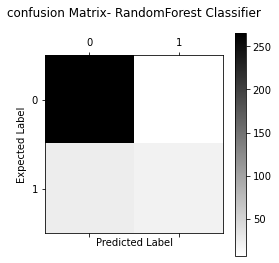

In [10]:
fig = plt.figure(figsize=(10,6))
plt.matshow(cm,cmap=plt.cm.binary,interpolation='nearest')
plt.title("confusion Matrix- RandomForest Classifier\n")
plt.colorbar()
plt.ylabel("Expected Label")
plt.xlabel("Predicted Label")
plt.show()


In [11]:
print("Total Predictions :",len(y_pred))
print("Correct prediction:",sum(y_pred==y_test))
print("Incorrect Prediction:",sum(y_pred!=y_test))
print("Accuracy:",sum(y_pred==y_test)*100/len(y_pred),"%")

Total Predictions : 320
Correct prediction: 287
Incorrect Prediction: 33
Accuracy: 89.6875 %
